I obtained the financial statements data using the Yahoo Finance API. The API documentation specifies that only the last four quarters are available for quarterly financial statements, while the data for yearly financial statements covers the last three years.

Below is a financial analysis specifically focusing on SolarEdge. Given the high correlation observed among all the companies, analyzing a single company provides sufficient insight.

In [227]:
import pandas as pd
df = pd.read_csv(r'/Users/admin/Desktop/python/final_project/data/income  statement/quarter/sedg_quarter_income_stmt.csv')

In [228]:
merged_data = pd.read_csv(r'/Users/admin/Desktop/python/final_project/merged_data.csv')
merged_data

,Date,US_Interest_Rate,EU_Interest_Rate,US_Electricity_Price,Electricity_Price_Germany_EUR/MWh,Electricity_Price_Netherlands_EUR/MWh,Electricity_Price_Italy_EUR/MWh,Electricity_Price_UK_GBP/MWh,US_Crude_Oil_Price_USD/barrel,US_Natural_Gas_Price_USD/mBtu,...,Sedg_mean_close,Enph_mean_close,Spwr_mean_close,Fslr_mean_close,Quarter,Revenue_sedg,Gross_profit_sedg,Gross_margin_sedg,Operating_income_sedg,Net_income_sedg
0,1.1.2017,0.65,-0.4,0.134,52.372957,50.765282,58.969758,52.855793,52.50,3.30,...,13.442500,1.473500,4.584152,33.565000,Q1 -17,NaN,NaN,NaN,NaN,NaN
1,1.2.2017,0.66,-0.4,0.135,39.701607,43.062321,51.661265,49.185402,53.47,2.85,...,13.894737,1.596842,4.984318,34.016316,Q1 -17,NaN,NaN,NaN,NaN,NaN
2,1.3.2017,0.79,-0.4,0.134,31.701386,34.527927,43.055747,41.921050,49.33,2.88,...,14.354348,1.322174,4.542581,31.113913,Q1 -17,NaN,NaN,NaN,NaN,NaN
3,1.4.2017,0.90,-0.4,0.135,28.869917,35.365444,42.022514,41.070333,51.06,3.10,...,15.855263,1.292105,4.347706,27.445789,Q2 -17,NaN,NaN,NaN,NaN,NaN
4,1.5.2017,0.91,-0.4,0.137,30.460511,35.062124,43.046304,41.106720,48.48,3.15,...,17.470454,0.905000,4.861285,35.814545,Q2 -17,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1.10.2023,5.33,4.0,0.169,86.882940,90.244201,134.063450,125.039458,85.64,2.98,...,106.913636,110.130909,5.184545,149.748636,Q4 -23,NaN,NaN,NaN,NaN,NaN
82,1.11.2023,5.33,4.0,0.168,90.587955,94.406917,118.970736,122.896458,77.69,2.71,...,76.020476,88.871905,4.223810,149.416666,Q4 -23,NaN,NaN,NaN,NaN,NaN
83,1.12.2023,5.33,4.0,0.169,69.918280,73.188427,114.929906,89.065296,71.90,2.52,...,89.326001,119.628000,4.898500,160.153499,Q4 -23,NaN,NaN,NaN,NaN,NaN
84,1.1.2024,5.33,4.0,0.170,75.777013,78.363750,98.398683,99.520306,76.50,2.74,...,74.698095,111.683810,3.516191,155.739048,Q1-24,NaN,NaN,NaN,NaN,NaN


In [229]:
# Convert 'Date' column to datetime type
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%d.%m.%Y')


In [230]:
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True) # Renamed to 'Date'

In [231]:
df.shape

(48, 5)

In [232]:
df.describe()

,30.9.2023,30.6.2023,31.3.2023,31.12.2022
count,4.600000e+01,4.400000e+01,4.500000e+01,4.300000e+01
mean,7.559713e+07,1.579785e+08,1.527632e+08,1.271052e+08
std,2.135796e+08,2.557366e+08,2.416273e+08,2.646757e+08
min,-6.117600e+07,-3.384000e+06,-2.367400e+07,-5.093300e+07
25%,-1.451975e+07,4.020005e+05,1.434000e+06,5.225000e+06
50%,0.000000e+00,8.347350e+07,7.753300e+07,2.109500e+07
75%,4.004075e+07,1.503580e+08,1.427200e+08,5.751466e+07
max,7.420310e+08,9.912900e+08,9.438890e+08,1.026073e+09


In [233]:
missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

print("Missing Values:")
print(missing_values[missing_values > 0])
print("\nNumber of Duplicated Rows:", duplicated_rows)

Missing Values:
Date          2
30.9.2023     2
30.6.2023     4
31.3.2023     3
31.12.2022    5
dtype: int64

Number of Duplicated Rows: 1


In [234]:
df.head(50)

,Date,30.9.2023,30.6.2023,31.3.2023,31.12.2022
0,Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,2.509500e+05,1.077720e+06
1,Tax Rate For Calcs,2.100000e-01,2.230000e-01,1.750000e-01,2.100000e-01
2,Normalized EBITDA,-1.432000e+06,1.636190e+08,1.547500e+08,2.109500e+07
3,Total Unusual Items,0.000000e+00,0.000000e+00,1.434000e+06,5.132000e+06
4,Total Unusual Items Excluding Goodwill,0.000000e+00,0.000000e+00,1.434000e+06,5.132000e+06
5,Net Income From Continuing Operation Net Minor...,-6.117600e+07,1.195100e+08,1.383780e+08,2.082900e+07
6,Reconciled Depreciation,1.529400e+07,1.326100e+07,1.346400e+07,1.236400e+07
7,Reconciled Cost Of Revenue,5.824880e+08,6.739850e+08,6.437630e+08,6.296550e+08
8,EBITDA,-1.432000e+06,1.636190e+08,1.561840e+08,2.622700e+07
9,EBIT,-1.672600e+07,1.503580e+08,1.427200e+08,1.386300e+07


We'll check if we need those missing values for our analysis.

Let's transform our data and save new dataset.

In [235]:
data_trans = df.transpose()

In [236]:
data_trans.to_csv('sedg_quarter_income_stmt_trans.csv', header=False) 

In [237]:
new_data = pd.read_csv('sedg_quarter_income_stmt_trans.csv')
new_data.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Unnamed: 47,Unnamed: 48
0,30.9.2023,0.0,0.210,-1432000.0,0.0,0.0,-61176000.0,15294000.0,582488000.0,-1432000.0,...,79461000.0,40351000.0,39110000.0,39110000.0,142817000.0,582488000.0,725305000.0,6.764100e+08,NaN,NaN
1,30.6.2023,0.0,0.223,163619000.0,0.0,0.0,119510000.0,13261000.0,673985000.0,163619000.0,...,80421000.0,44222000.0,36199000.0,36199000.0,317305000.0,673985000.0,991290000.0,9.473600e+08,NaN,NaN
2,31.3.2023,250950.0,0.175,154750000.0,1434000.0,1434000.0,138378000.0,13464000.0,643763000.0,156184000.0,...,77533000.0,40966000.0,36567000.0,36567000.0,300126000.0,643763000.0,943889000.0,9.085050e+08,NaN,NaN
3,31.12.2022,1077720.0,0.210,21095000.0,5132000.0,5132000.0,20829000.0,12364000.0,629655000.0,26227000.0,...,72676000.0,42663000.0,30013000.0,30013000.0,261047000.0,629655000.0,890702000.0,1.026073e+09,NaN,NaN


In [238]:
types = list(new_data.columns)[1:]
types

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Total Unusual Items',
 'Total Unusual Items Excluding Goodwill',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Average Dilution Earnings',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Special Income Charges',
 'Gain On Sale Of Ppe',
 'Impairment Of Capital Assets',
 'Net Non Operating Interest Income Expense',
 'Total Other Finance Cost',
 'O

In [239]:
new_data.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Selling General And Administration,Selling And Marketing Expense,General And Administrative Expense,Other Gand A,Gross Profit,Cost Of Revenue,Total Revenue,Operating Revenue,Unnamed: 47,Unnamed: 48
0,30.9.2023,0.0,0.210,-1432000.0,0.0,0.0,-61176000.0,15294000.0,582488000.0,-1432000.0,...,79461000.0,40351000.0,39110000.0,39110000.0,142817000.0,582488000.0,725305000.0,6.764100e+08,NaN,NaN
1,30.6.2023,0.0,0.223,163619000.0,0.0,0.0,119510000.0,13261000.0,673985000.0,163619000.0,...,80421000.0,44222000.0,36199000.0,36199000.0,317305000.0,673985000.0,991290000.0,9.473600e+08,NaN,NaN
2,31.3.2023,250950.0,0.175,154750000.0,1434000.0,1434000.0,138378000.0,13464000.0,643763000.0,156184000.0,...,77533000.0,40966000.0,36567000.0,36567000.0,300126000.0,643763000.0,943889000.0,9.085050e+08,NaN,NaN
3,31.12.2022,1077720.0,0.210,21095000.0,5132000.0,5132000.0,20829000.0,12364000.0,629655000.0,26227000.0,...,72676000.0,42663000.0,30013000.0,30013000.0,261047000.0,629655000.0,890702000.0,1.026073e+09,NaN,NaN


Quarterly Revenue

Transform Dates to Quarters

In [240]:
# Assuming 'Date' is in datetime format, if not, convert it first
new_data['Date'] = pd.to_datetime(new_data['Date'])

# Extracting quarter and year information
new_data['Quarters'] = new_data['Date'].dt.to_period('Q')

# Formatting the quarters column as desired
new_data['Quarters'] = 'Q' + new_data['Quarters'].dt.quarter.astype(str) + ' - ' + new_data['Quarters'].dt.year.astype(str).str[2:]

# Displaying the first few rows to verify
print(new_data[['Date', 'Quarters']].head())


        Date Quarters
0 2023-09-30  Q3 - 23
1 2023-06-30  Q2 - 23
2 2023-03-31  Q1 - 23
3 2022-12-31  Q4 - 22


/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_44821/3490466823.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_data['Date'] = pd.to_datetime(new_data['Date'])


1. Profitability Analysis:

Calculate and analyze metrics such as Gross Profit Margin, Net Profit Margin, and Operating Profit Margin

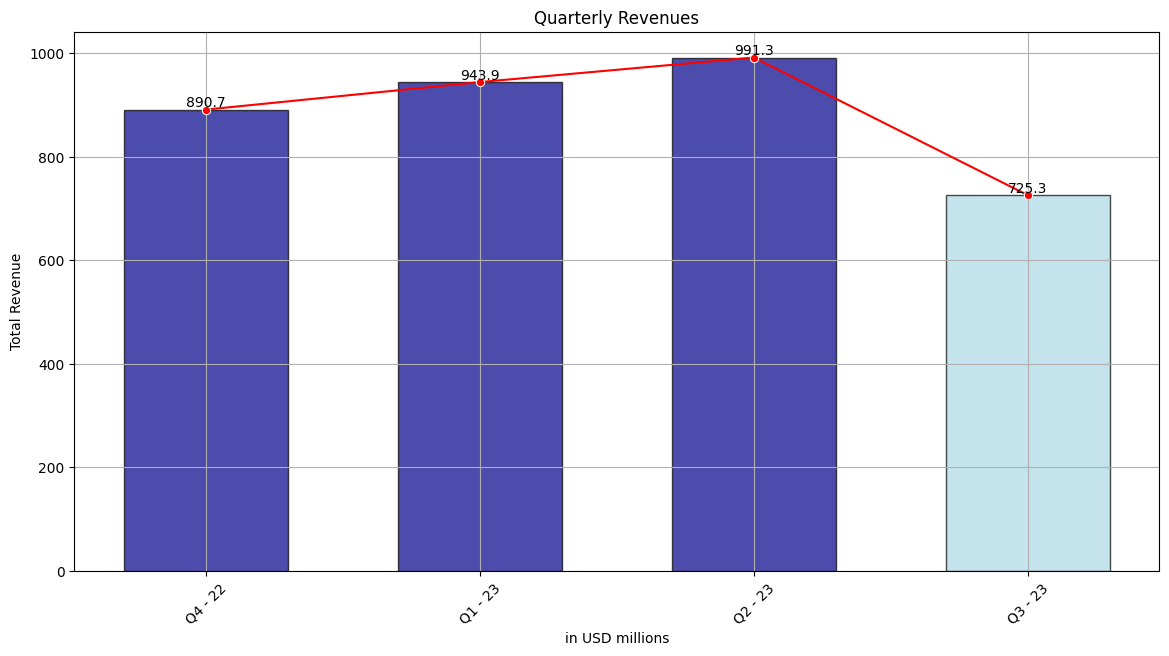

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt
# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

# Convert revenue values to millions with one decimal place
revenue_millions = new_data_sorted['Total Revenue'] / 1_000_000

# Plotting bar chart of 'Total Revenue' with quarters on x-axis
plt.figure(figsize=(14, 7))

# Set the color for each bar based on the Quarter
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

bars = plt.bar(new_data_sorted['Quarters'], revenue_millions, width=0.6, edgecolor='black', alpha=0.7, color=colors)

plt.title('Quarterly Revenues')
plt.xlabel('in USD millions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Add revenue values (in millions) on top of each bar
for bar, revenue in zip(bars, revenue_millions):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{revenue:.1f}', ha='center', va='bottom')

# Add a line plot showing the distribution of revenue values
sns.lineplot(x=new_data_sorted['Quarters'], y=revenue_millions, color='red',marker='o', linestyle='-')

plt.show()

As we can observe, the company's revenues decreased significantly in the third quarter compared to previous quarters.

Gross Profit Margin

Gross Profit Margin - is the portion of a company's revenue left over after direct costs are subtracted. 

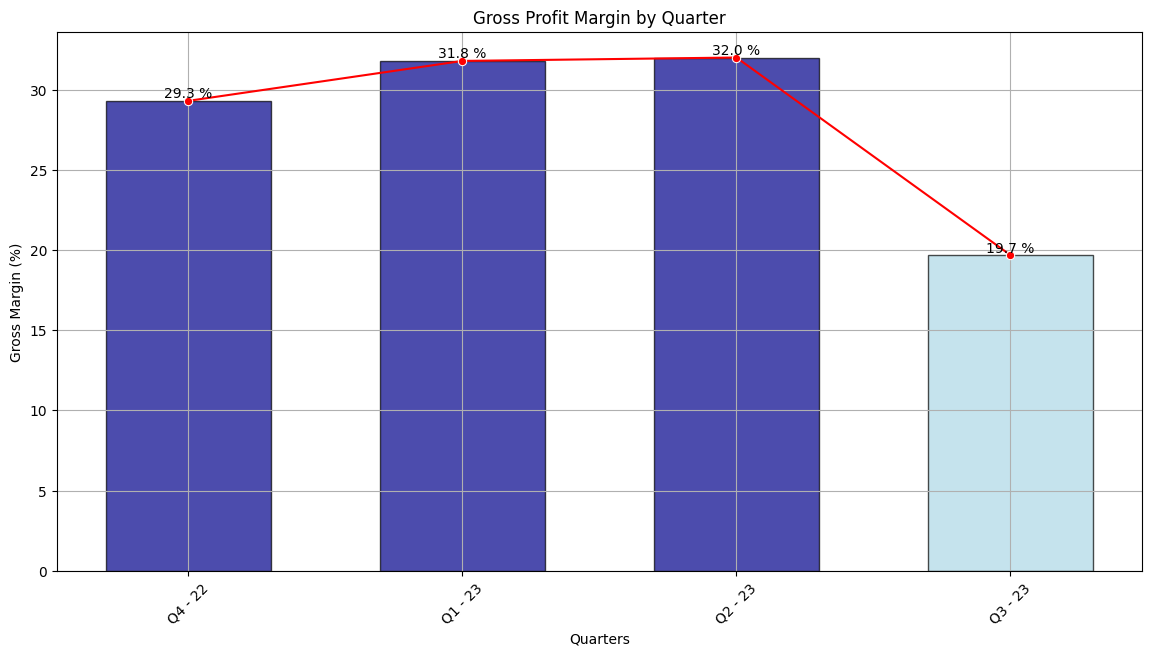

In [242]:
# Calculate Gross Profit as a percentage of Total Revenue
new_data['Gross Margin'] = ((new_data['Total Revenue'] - new_data['Cost Of Revenue']) / new_data['Total Revenue']) * 100

# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

# Plotting bar chart of 'Gross Margin' with quarters on x-axis
plt.figure(figsize=(14, 7))

# Set the color for each bar based on the Quarter
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

bars = plt.bar(new_data_sorted['Quarters'], new_data_sorted['Gross Margin'], width=0.6, edgecolor='black', alpha=0.7, color=colors)

plt.title('Gross Profit Margin by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Gross Margin (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Add Gross Margin values on top of each bar
for bar, margin in zip(bars, new_data_sorted['Gross Margin']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{margin:.1f} %', ha='center', va='bottom')

# Add a line plot showing the distribution of Gross Margin values
sns.lineplot(x=new_data_sorted['Quarters'], y=new_data_sorted['Gross Margin'], color='red', marker='o', linestyle='-')
plt.show()


The gross profit margin decreased from 32% in Q2 to 19.7% in Q3.Such a decrease in gross profit margin can be indicative of various factors, such as increased production costs, pricing pressures, or changes in sales mix.

Net Profit Margin

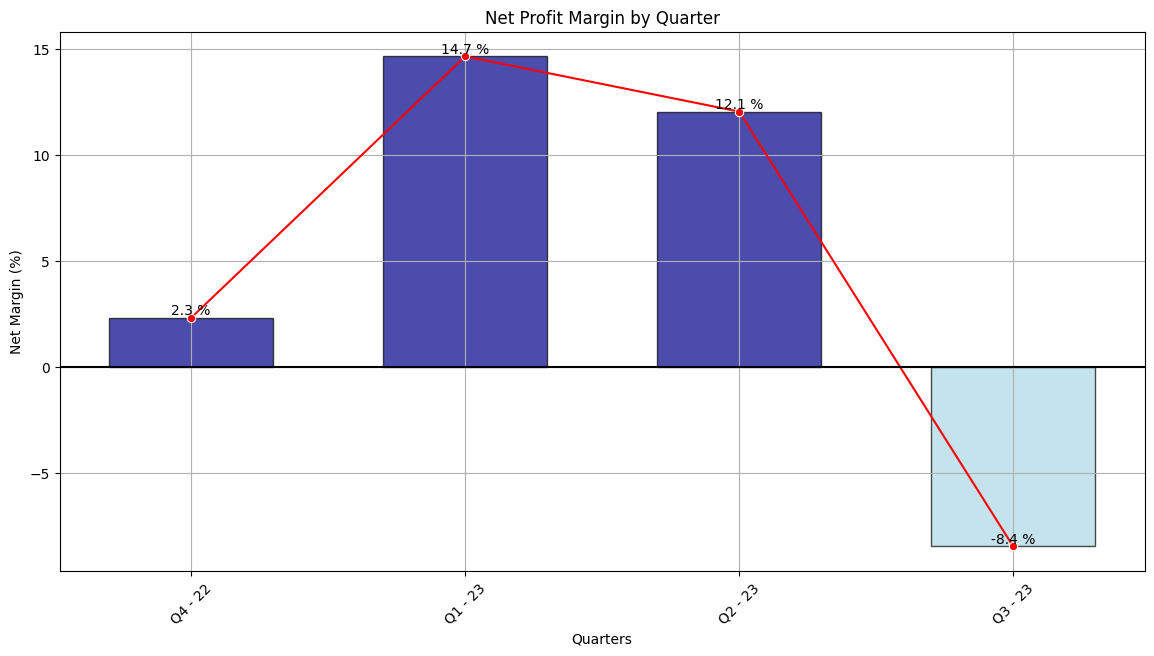

In [243]:
# Calculate Gross Profit as a percentage of Total Revenue
new_data['Net Margin'] = (new_data['Net Income'] / new_data['Total Revenue']) * 100

# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

# Plotting bar chart of 'Gross Margin' with quarters on x-axis
plt.figure(figsize=(14, 7))

# Set the color for each bar based on the Quarter
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

bars = plt.bar(new_data_sorted['Quarters'], new_data_sorted['Net Margin'], width=0.6, edgecolor='black', alpha=0.7, color=colors)

plt.title('Net Profit Margin by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Net Margin (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Add Gross Margin values on top of each bar
for bar, margin in zip(bars, new_data_sorted['Net Margin']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{margin:.1f} %', ha='center', va='bottom')

# Add a line plot showing the distribution of Gross Margin values
sns.lineplot(x=new_data_sorted['Quarters'], y=new_data_sorted['Net Margin'], color='red', marker='o', linestyle='-')
# Draw x-axis
plt.axhline(y=0, color='black', linewidth=1.5)
plt.show()

In Q3 2023, the net profit margin took a significant downturn, plummeting to -8.4%, indicating a negative profit margin. This indicates that the company incurred losses during that period, highlighting potential challenges or issues impacting its financial performance.

Operating Profit Margin:

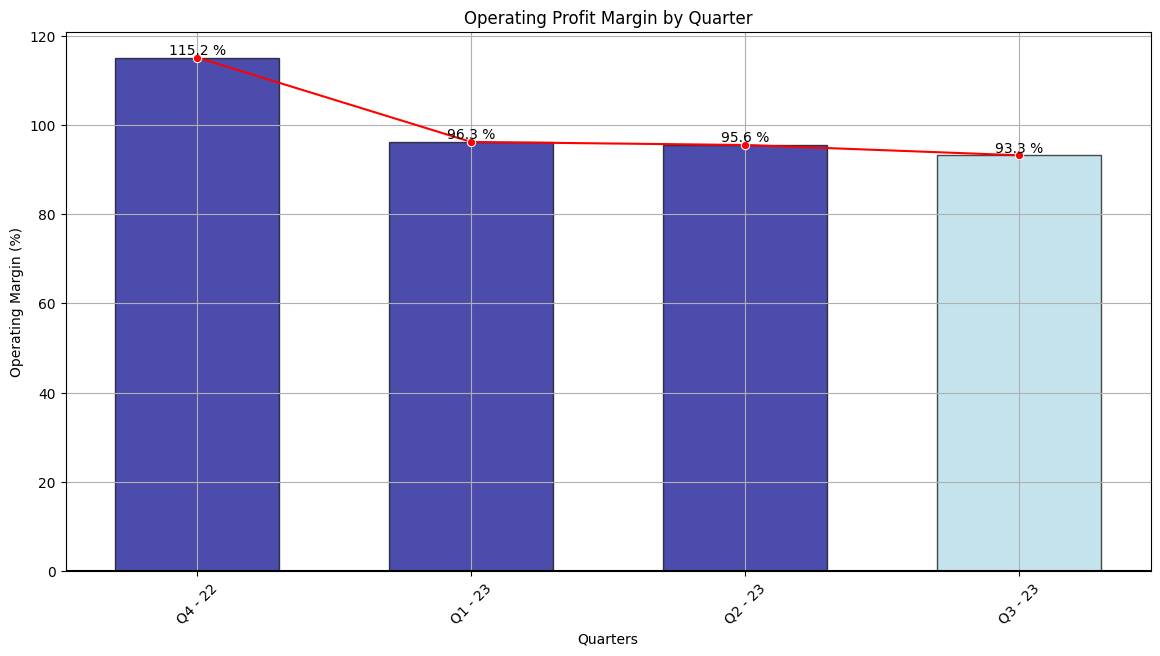

In [244]:
# Calculate Gross Profit as a percentage of Total Revenue
new_data['Operating Margin'] = (new_data['Operating Revenue'] / new_data['Total Revenue']) * 100

# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

# Plotting bar chart of 'Gross Margin' with quarters on x-axis
plt.figure(figsize=(14, 7))

# Set the color for each bar based on the Quarter
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

bars = plt.bar(new_data_sorted['Quarters'], new_data_sorted['Operating Margin'], width=0.6, edgecolor='black', alpha=0.7, color=colors)

plt.title('Operating Profit Margin by Quarter')
plt.xlabel('Quarters')
plt.ylabel('Operating Margin (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Add Gross Margin values on top of each bar
for bar, margin in zip(bars, new_data_sorted['Operating Margin']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{margin:.1f} %', ha='center', va='bottom')

# Add a line plot showing the distribution of Gross Margin values
sns.lineplot(x=new_data_sorted['Quarters'], y=new_data_sorted['Operating Margin'], color='red', marker='o', linestyle='-')
# Draw x-axis
plt.axhline(y=0, color='black', linewidth=1.5)
plt.show()

The operating profit margin also declined along with the net profit margin, it suggests that SolarEdge's profitability from its core business activities decreased. 

2. Operating Expense Analysis:

Operating Expenses by Quarter

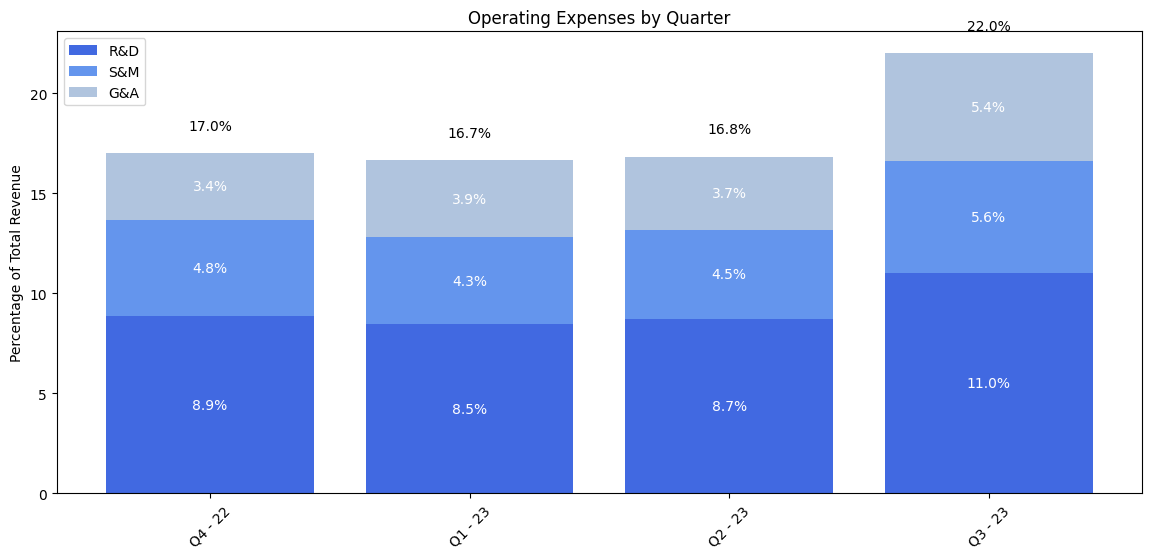

In [245]:
# Calculate the percentage of each component of Operating Expenses relative to Total Revenue
new_data['R&D %'] = (new_data['Research And Development'] / new_data['Total Revenue']) * 100
new_data['S&M %'] = (new_data['Selling And Marketing Expense'] / new_data['Total Revenue']) * 100
new_data['G&A %'] = (new_data['General And Administrative Expense'] / new_data['Total Revenue']) * 100

# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

# Define colors
colors = ['royalblue', 'cornflowerblue', 'lightsteelblue']

# Plotting stacked bar chart of Operating Expenses with quarters on x-axis
plt.figure(figsize=(14, 6))

# Stacked bar chart for R&D
plt.bar(new_data_sorted['Quarters'], new_data_sorted['R&D %'], color=colors[0], label='R&D')

# Stacked bar chart for S&M
plt.bar(new_data_sorted['Quarters'], new_data_sorted['S&M %'], bottom=new_data_sorted['R&D %'], color=colors[1], label='S&M')

# Stacked bar chart for G&A
plt.bar(new_data_sorted['Quarters'], new_data_sorted['G&A %'], bottom=new_data_sorted['R&D %'] + new_data_sorted['S&M %'], color=colors[2], label='G&A')

# Write insights of each part percentage
for i, quarter in enumerate(new_data_sorted['Quarters']):
    plt.text(quarter, new_data_sorted['R&D %'].iloc[i] / 2, f'{new_data_sorted["R&D %"].iloc[i]:.1f}%', ha='center', va='center', color='white')
    plt.text(quarter, new_data_sorted['R&D %'].iloc[i] + new_data_sorted['S&M %'].iloc[i] / 2, f'{new_data_sorted["S&M %"].iloc[i]:.1f}%', ha='center', va='center', color='white')
    plt.text(quarter, new_data_sorted['R&D %'].iloc[i] + new_data_sorted['S&M %'].iloc[i] + new_data_sorted['G&A %'].iloc[i] / 2, f'{new_data_sorted["G&A %"].iloc[i]:.1f}%', ha='center', va='center', color='white')

# Write total Operating Expense percentage on top of each bar
for i, quarter in enumerate(new_data_sorted['Quarters']):
    total_expense = new_data_sorted['R&D %'].iloc[i] + new_data_sorted['S&M %'].iloc[i] + new_data_sorted['G&A %'].iloc[i]
    plt.text(quarter, total_expense + 1, f'{total_expense:.1f}%', ha='center', va='bottom')

plt.title('Operating Expenses by Quarter')
plt.ylabel('Percentage of Total Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Conversely, expenses of the company increased in all departments: research and development (R&D), sales and marketing (S&M), and general administration (G&A). This indicates that SolarEdge invested more in these areas during that period.

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_44821/2782709036.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_data_sorted['Quarters'], rotation=45)
/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_44821/2782709036.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_data_sorted['Quarters'], rotation=45)


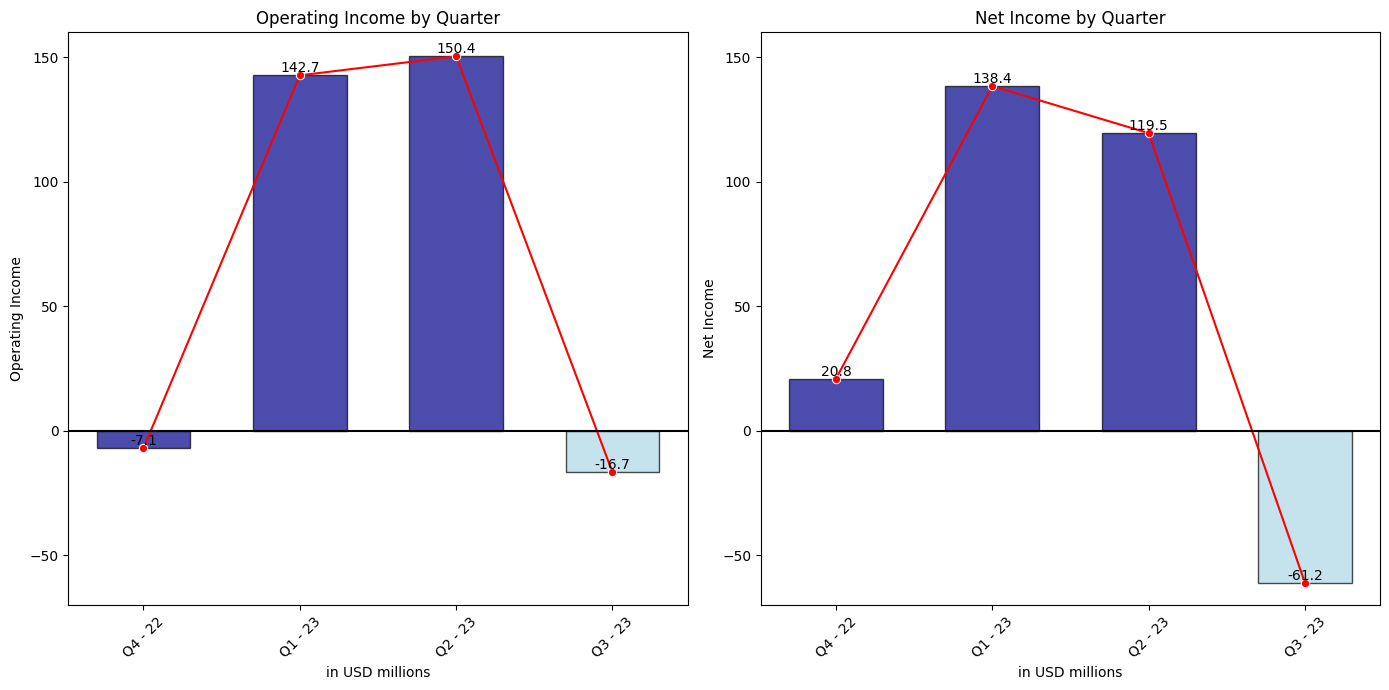

In [246]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: Operating Income by Quarter
operating_income = new_data_sorted['Operating Income'] / 1_000_000
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]
bars1 = axes[0].bar(new_data_sorted['Quarters'], operating_income, width=0.6, edgecolor='black', alpha=0.7, color=colors)
axes[0].set_title('Operating Income by Quarter')
axes[0].set_xticklabels(new_data_sorted['Quarters'], rotation=45)
axes[0].set_xlabel('in USD millions')
for bar, revenue in zip(bars1, operating_income):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{revenue:.1f}', ha='center', va='bottom')
sns.lineplot(ax=axes[0], x=new_data_sorted['Quarters'], y=operating_income, color='red', marker='o', linestyle='-')
axes[0].axhline(y=0, color='black', linewidth=1.5)
axes[0].set_ylim(-70, 160)  # Set y-axis limits

# Plot 2: Net Income by Quarter
net_income = new_data_sorted['Net Income'] / 1_000_000
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]
bars2 = axes[1].bar(new_data_sorted['Quarters'], net_income, width=0.6, edgecolor='black', alpha=0.7, color=colors)
axes[1].set_title('Net Income by Quarter')
axes[1].set_xticklabels(new_data_sorted['Quarters'], rotation=45)
axes[1].set_xlabel('in USD millions')
for bar, revenue in zip(bars2, net_income):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{revenue:.1f}', ha='center', va='bottom')
sns.lineplot(ax=axes[1], x=new_data_sorted['Quarters'], y=net_income, color='red', marker='o', linestyle='-')
axes[1].axhline(y=0, color='black', linewidth=1.5)
axes[1].set_ylim(-70, 160)  # Set y-axis limits

plt.tight_layout()
plt.show()


The operating income plummeted from a positive $150.4 million in Q2 to a negative $16.7 million in Q3. Similarly, the net income dropped from a positive $119.5 million in Q2 to a negative $61.2 million in Q3.

The decline in operating income and net income signifies a substantial decrease in profitability for SolarEdge from Q2 to Q3. Operating income reflects the company's earnings from its core business operations after deducting operating expenses. The negative operating income in Q3 indicates that the company's operating expenses exceeded its revenue during that period.

Similarly, net income represents the company's total earnings after accounting for all expenses, including taxes and interest. The negative net income in Q3 indicates that SolarEdge incurred losses after considering all expenses, including operating expenses, taxes, and interest payments.

Overall, these declines suggest financial challenges for SolarEdge during Q3, potentially resulting from various factors such as decreased revenue, increased expenses, or other operational difficulties.

3. Efficiency Analysis

Now, I need to fetch additional data - the balance sheet, also on a quarterly basis. Let's download and proceed with data cleaning and preparation.

In [247]:
balance_sheet_df = pd.read_csv(r'/Users/admin/Desktop/python/final_project/data/balance sheet/quarter/sedg_quarter_balance_sheet.csv')
balance_sheet_df.head()

,Unnamed: 0,30.9.2023,30.6.2023,31.3.2023,31.12.2022
0,Ordinary Shares Number,5.681056e+07,5.655634e+07,5.634316e+07,5.613340e+07
1,Share Issued,5.681056e+07,5.655634e+07,5.634316e+07,5.613340e+07
2,Net Debt,7.552500e+07,6.817000e+07,NaN,NaN
3,Total Debt,7.336480e+08,7.350290e+08,7.369630e+08,7.322750e+08
4,Tangible Book Value,2.407258e+09,2.434201e+09,2.302927e+09,2.125248e+09


In [248]:
balance_sheet_df.shape

(86, 5)

In [249]:
balance_sheet_df.rename(columns={'Unnamed: 0':'Date'}, inplace=True) # Renamed to 'Date'

In [250]:
missing_values = balance_sheet_df.isnull().sum()
duplicated_rows = balance_sheet_df.duplicated().sum()

print("Missing Values:")
print(missing_values[missing_values > 0])
print("\nNumber of Duplicated Rows:", duplicated_rows)

Missing Values:
30.9.2023     15
30.6.2023     18
31.3.2023     22
31.12.2022     7
dtype: int64

Number of Duplicated Rows: 0


We'll check if we need values, that are missing, for our analysis.

Let's transform our data and save new dataset.

In [251]:
df_trans = balance_sheet_df.transpose()

In [252]:
df_trans.to_csv('sedg_quarter_balance_sheet_trans.csv', header=False) 

In [253]:
new_df = pd.read_csv('sedg_quarter_balance_sheet_trans.csv')
new_df.head()

,Date,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Accrued Interest Receivable,Loans Receivable,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
0,30.9.2023,56810559.0,56810559.0,75525000.0,733648000.0,2.407258e+09,3.117053e+09,2.486816e+09,2.407258e+09,107001000.0,...,7162000.0,8125000.0,9.395450e+08,-14930000.0,9.544750e+08,1.028397e+09,477275000.0,551122000.0,NaN,NaN
1,30.6.2023,56556340.0,56556340.0,68170000.0,735029000.0,2.434201e+09,3.146103e+09,2.551393e+09,2.434201e+09,109115000.0,...,NaN,NaN,1.149820e+09,-6890000.0,1.156710e+09,1.050920e+09,493176000.0,557744000.0,NaN,NaN
2,31.3.2023,56343164.0,56343164.0,NaN,736963000.0,2.302927e+09,2.975976e+09,2.342024e+09,2.302927e+09,111781000.0,...,NaN,NaN,9.695430e+08,-4422000.0,9.739650e+08,1.138669e+09,410820000.0,727849000.0,NaN,NaN
3,31.12.2022,56133404.0,56133404.0,NaN,732275000.0,2.125248e+09,2.800817e+09,2.009941e+09,2.125248e+09,107824000.0,...,NaN,NaN,9.051460e+08,-3202000.0,9.083480e+08,1.024229e+09,241117000.0,783112000.0,88108000.0,695004000.0


In [254]:
types = list(new_df.columns)[1:]
types

['Ordinary Shares Number',
 'Share Issued',
 'Net Debt',
 'Total Debt',
 'Tangible Book Value',
 'Invested Capital',
 'Working Capital',
 'Net Tangible Assets',
 'Capital Lease Obligations',
 'Common Stock Equity',
 'Total Capitalization',
 'Total Equity Gross Minority Interest',
 'Stockholders Equity',
 'Gains Losses Not Affecting Retained Earnings',
 'Other Equity Adjustments',
 'Foreign Currency Translation Adjustments',
 'Unrealized Gain Loss',
 'Retained Earnings',
 'Additional Paid In Capital',
 'Capital Stock',
 'Common Stock',
 'Total Liabilities Net Minority Interest',
 'Total Non Current Liabilities Net Minority Interest',
 'Other Non Current Liabilities',
 'Employee Benefits',
 'Non Current Pension And Other Postretirement Benefit Plans',
 'Tradeand Other Payables Non Current',
 'Non Current Deferred Liabilities',
 'Non Current Deferred Revenue',
 'Long Term Debt And Capital Lease Obligation',
 'Long Term Capital Lease Obligation',
 'Long Term Debt',
 'Current Liabilities',


Let's merge two our dataframes.

In [255]:
# Convert the 'Date' column in new_df to datetime64[ns] type
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Merge the two dataframes on the 'Date' column
merged_df = pd.merge(new_data_sorted, new_df, on='Date', how='inner')

/var/folders/rj/2p32fcmd2xlgrrvylgn46qt40000gn/T/ipykernel_44821/2848941428.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new_df['Date'] = pd.to_datetime(new_df['Date'])


In [256]:
# Save merged_df as scv file
merged_df.to_csv('merged_financial_data.csv', index=False)

In [257]:
merged_df.head()

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Total Unusual Items,Total Unusual Items Excluding Goodwill,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,...,Accrued Interest Receivable,Loans Receivable,Accounts Receivable,Allowance For Doubtful Accounts Receivable,Gross Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
0,2022-12-31,1077720.0,0.210,21095000.0,5132000.0,5132000.0,20829000.0,12364000.0,629655000.0,26227000.0,...,NaN,NaN,9.051460e+08,-3202000.0,9.083480e+08,1.024229e+09,241117000.0,783112000.0,88108000.0,695004000.0
1,2023-03-31,250950.0,0.175,154750000.0,1434000.0,1434000.0,138378000.0,13464000.0,643763000.0,156184000.0,...,NaN,NaN,9.695430e+08,-4422000.0,9.739650e+08,1.138669e+09,410820000.0,727849000.0,NaN,NaN
2,2023-06-30,0.0,0.223,163619000.0,0.0,0.0,119510000.0,13261000.0,673985000.0,163619000.0,...,NaN,NaN,1.149820e+09,-6890000.0,1.156710e+09,1.050920e+09,493176000.0,557744000.0,NaN,NaN
3,2023-09-30,0.0,0.210,-1432000.0,0.0,0.0,-61176000.0,15294000.0,582488000.0,-1432000.0,...,7162000.0,8125000.0,9.395450e+08,-14930000.0,9.544750e+08,1.028397e+09,477275000.0,551122000.0,NaN,NaN


In [258]:
merged_df.shape

(4, 144)

Now let's check the efficiency of the company's operations using ratios such as Inventory Turnover, Accounts Receivable Turnover, and Accounts Payable Turnover.

Inventory Turnover Ratio:

In [259]:
# Calculate the sum of inventory for each quarter
inventory_sum_per_quarter = merged_df.groupby('Quarter')['Inventory'].sum()

# Calculate the number of quarters
num_quarters = len(inventory_sum_per_quarter)

# Calculate the average inventory
average_inventory = inventory_sum_per_quarter.sum() / num_quarters

# Calculate Inventory Turnover for each quarter
merged_df['Inventory Turnover'] = merged_df['Cost Of Revenue'] / average_inventory

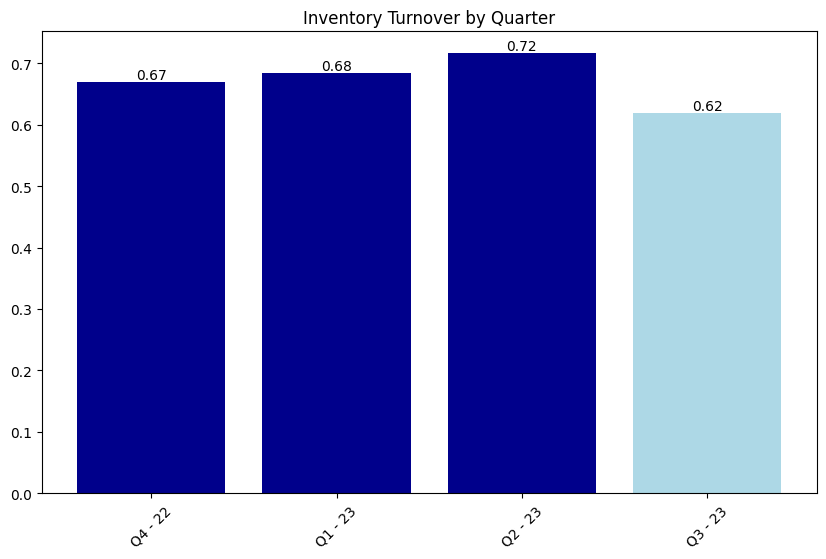

In [260]:
# Plotting the Inventory Turnover over time
plt.figure(figsize=(10, 6))
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

# Plotting the bar chart of Inventory Turnover for each quarter
bars = plt.bar(merged_df['Quarters'], merged_df['Inventory Turnover'], color=colors)

plt.title('Inventory Turnover by Quarter')
plt.xticks(rotation=45)

# Add values on top of each bar
for bar, turnover in zip(bars, merged_df['Inventory Turnover']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{turnover:.2f}', ha='center', va='bottom')
    
plt.show()

We can observe a lower value for Inventory Turnover in Q3 2023 
The reasons for that :

Slow Inventory Movement: A decrease in Inventory Turnover suggests that the company is taking longer to sell its inventory. Caused by decreased demand for the company's products and overstocking of inventory.

Decreased Sales: A decline in sales during Q3 2023 compared to previous quarters could lead to a lower Inventory Turnover ratio. This might be attributed to seasonal factors, economic downturns, or other external factors impacting consumer behavior.

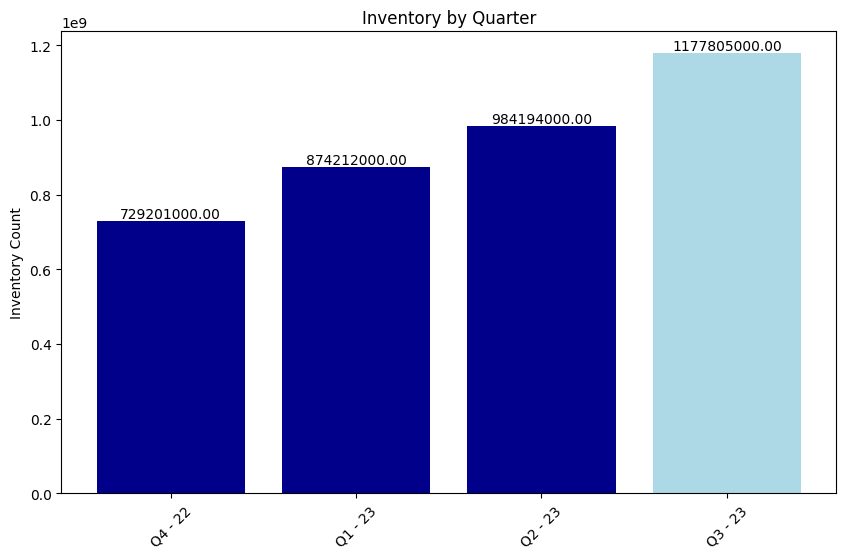

In [261]:
# Plotting the Inventory Turnover over time
plt.figure(figsize=(10, 6))
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

# Plotting the bar chart of Inventory Turnover for each quarter
bars = plt.bar(merged_df['Quarters'], merged_df['Inventory'], color=colors)

plt.title('Inventory by Quarter')
plt.ylabel('Inventory Count')
plt.xticks(rotation=45)

# Add values on top of each bar
for bar, turnover in zip(bars, merged_df['Inventory']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{turnover:.2f}', ha='center', va='bottom')
    
plt.show()

We can also observe an increase in the inventory count over time. This is due a decrease in demand and a decline in sales.

Accounts Receivable Turnover:

In [262]:
# Calculate the sum of Accounts Receivable for each quarter
ar_sum_per_quarter = merged_df.groupby('Quarter')['Accounts Receivable'].sum()

# Calculate the number of quarters
num_quarters = len(ar_sum_per_quarter)

# Calculate the average Accounts Receivable
average_ar = ar_sum_per_quarter.sum() / num_quarters

# Calculate Accounts Receivable Turnover for each quarter
merged_df['Accounts Receivable Turnover'] = merged_df['Operating Revenue'] / average_ar


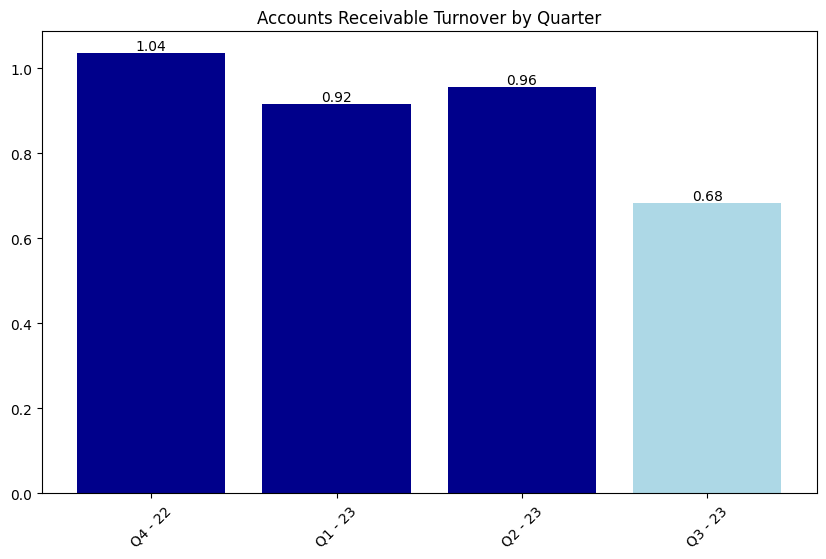

In [263]:
# Plotting the Inventory Turnover over time
plt.figure(figsize=(10, 6))
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

# Plotting the bar chart of Inventory Turnover for each quarter
bars = plt.bar(merged_df['Quarters'], merged_df['Accounts Receivable Turnover'], color=colors)

plt.title('Accounts Receivable Turnover by Quarter')
plt.xticks(rotation=45)

# Add values on top of each bar
for bar, turnover in zip(bars, merged_df['Accounts Receivable Turnover']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{turnover:.2f}', ha='center', va='bottom')
    
plt.show()

We can observe a decrease in the Accounts Receivable Turnover in Q3 2023, indicating a slower collection of receivables. This suggests that the company is taking longer to collect payments from its customers.

Accounts Payable Turnover:

In [264]:
# Calculate the sum of accounts payable for each quarter
accounts_payable_sum_per_quarter = merged_df.groupby('Quarter')['Accounts Payable'].sum()

# Calculate the number of quarters
num_quarters = len(accounts_payable_sum_per_quarter)

# Calculate the average accounts payable
average_accounts_payable = accounts_payable_sum_per_quarter.sum() / num_quarters

# Calculate Accounts Payable Turnover for each quarter
merged_df['Accounts Payable Turnover'] = merged_df['Operating Revenue'] / average_accounts_payable


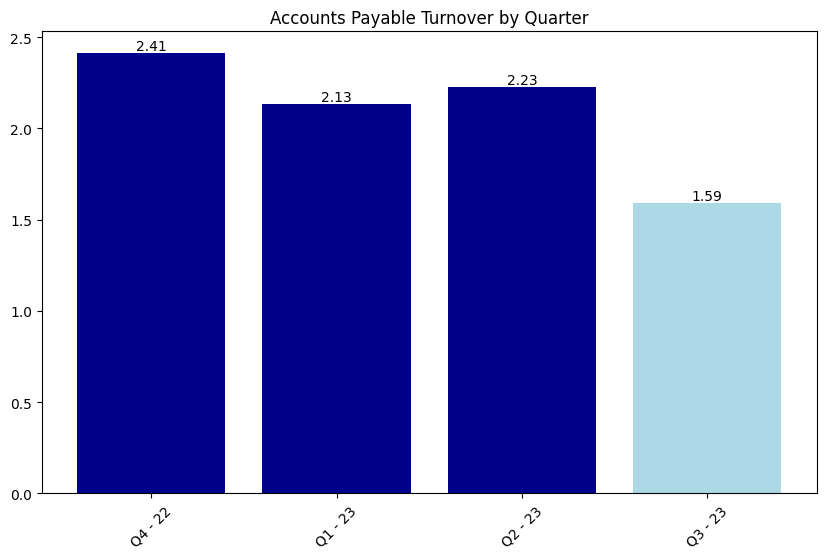

In [265]:
# Plotting the Inventory Turnover over time
plt.figure(figsize=(10, 6))
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

# Plotting the bar chart of Inventory Turnover for each quarter
bars = plt.bar(merged_df['Quarters'], merged_df['Accounts Payable Turnover'], color=colors)

plt.title('Accounts Payable Turnover by Quarter')
plt.xticks(rotation=45)

# Add values on top of each bar
for bar, turnover in zip(bars, merged_df['Accounts Payable Turnover']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{turnover:.2f}', ha='center', va='bottom')
    
plt.show()

The lowest value in Q3 2023 for the Accounts Payable Turnover indicates that the company is taking longer to pay off its suppliers relative to previous quarters. This could imply a Cash flow constraints: The company may be experiencing cash flow difficulties, leading to delays in paying its accounts payable.

Overall, a decrease in the Accounts Payable Turnover suggests a slowdown in the company's payment cycle, which may have implications for its liquidity position, supplier relationships, and overall financial health.

4. Liquidity Analysis

In the Liquidity Analysis, we can evaluate the company's ability to meet its short-term obligations using the following ratios:

Current Ratio: This ratio measures the company's ability to pay its short-term liabilities with its short-term assets.

Quick Ratio (Acid-Test Ratio): This ratio provides a more stringent measure of liquidity by excluding inventory from current assets.

In [266]:
# Calculate Current Ratio
merged_df['Current Ratio'] = merged_df['Current Assets'] / merged_df['Current Liabilities']

# Calculate Quick Ratio (Acid-Test Ratio)
quick_assets = merged_df['Current Assets'] - merged_df['Inventory']
merged_df['Quick Ratio'] = quick_assets / merged_df['Current Liabilities']


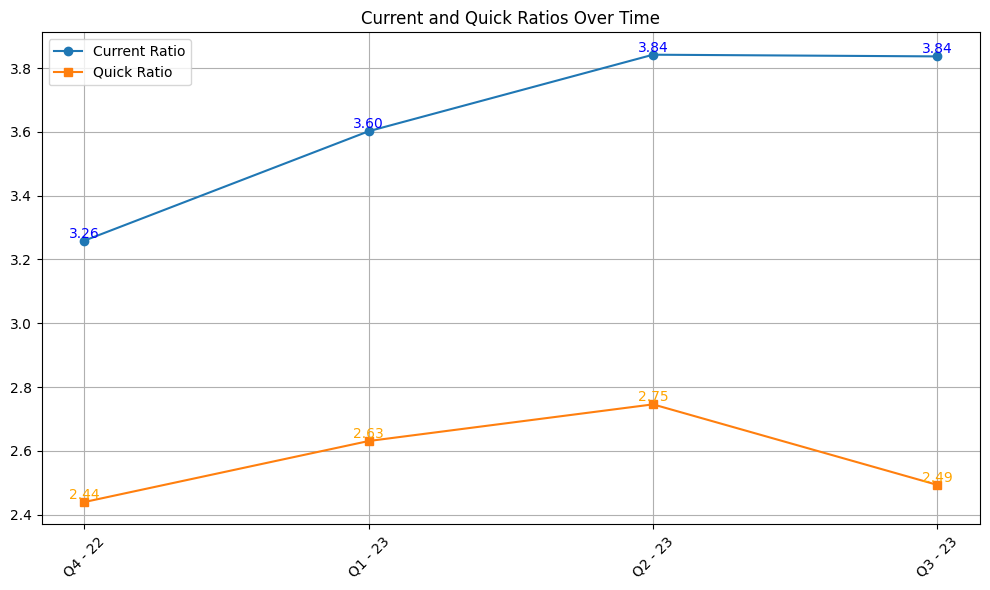

In [267]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot Current Ratio
plt.plot(merged_df['Quarters'], merged_df['Current Ratio'], marker='o', label='Current Ratio')
# Add values for Current Ratio
for i, ratio in enumerate(merged_df['Current Ratio']):
    plt.text(merged_df['Quarters'][i], ratio, f'{ratio:.2f}', ha='center', va='bottom', color='blue')

# Plot Quick Ratio
plt.plot(merged_df['Quarters'], merged_df['Quick Ratio'], marker='s', label='Quick Ratio')
# Add values for Quick Ratio
for i, ratio in enumerate(merged_df['Quick Ratio']):
    plt.text(merged_df['Quarters'][i], ratio, f'{ratio:.2f}', ha='center', va='bottom', color='orange')


plt.title('Current and Quick Ratios Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Current Ratio: The ratio remains the same in Q2 2023 as in Q1 2023, indicating that the company's ability to cover short-term liabilities with current assets has not changed between these two quarters. This stability suggests that the company's current assets are sufficient to meet its short-term obligations.

Quick Ratio: In contrast, the Quick Ratio decreases in Q3 2023 compared to Q1 and Q2 2023. This decrease suggests a decline in the company's ability to cover its short-term liabilities with its most liquid assets, excluding inventory. It may indicate that the company has become less capable of meeting its short-term obligations without relying on inventory, which could raise concerns about liquidity management.

5. Debt Management Analysis

EBITDA, or earnings before interest, taxes, depreciation, and amortization, is an alternate measure of profitability to net income. EBITDA attempts to represent the cash profit generated by the company's operations. 
EBITDA indicates how well the company is managing its day-to-day operations, including its core expenses such as the cost of goods sold. As such, it is a very fair indicator of a business's current state and potential.

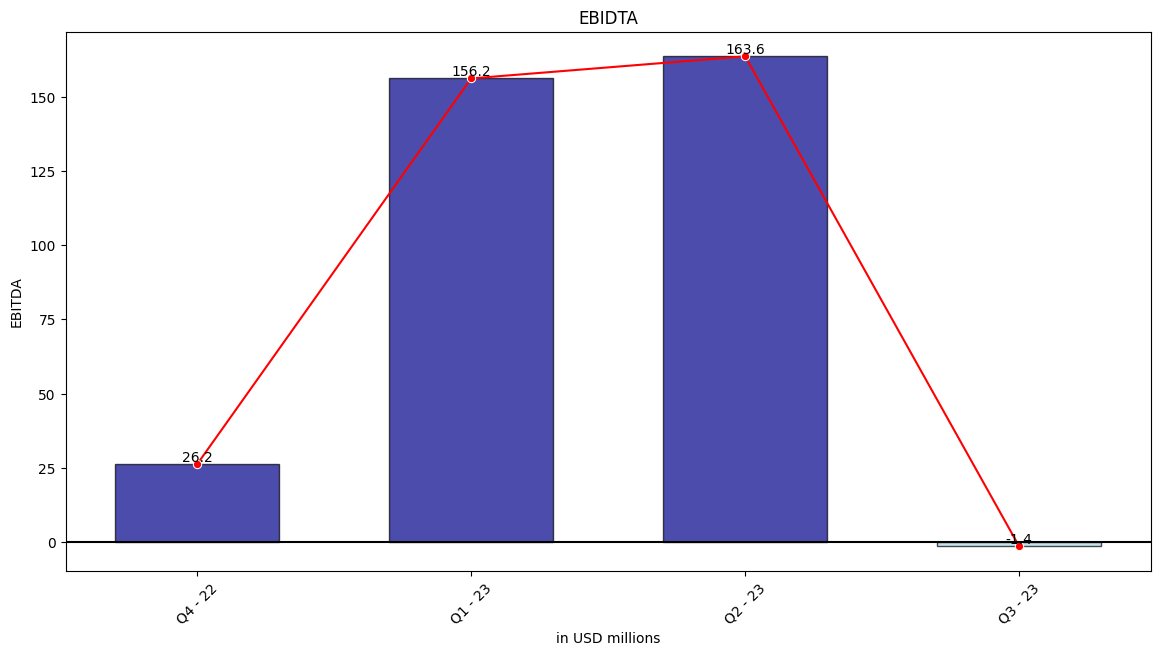

In [268]:
# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

# Convert revenue values to millions with one decimal place
ebidta = new_data_sorted['EBITDA'] / 1_000_000

# Plotting bar chart of 'Total Revenue' with quarters on x-axis
plt.figure(figsize=(14, 7))

# Set the color for each bar based on the Quarter
colors = ['darkblue' if q != 'Q3 - 23' else 'lightblue' for q in new_data_sorted['Quarters']]

bars = plt.bar(new_data_sorted['Quarters'], ebidta, width=0.6, edgecolor='black', alpha=0.7, color=colors)

plt.title('EBIDTA')
plt.xlabel('in USD millions')
plt.xticks(rotation=45) 

# Add revenue values (in millions) on top of each bar
for bar, revenue in zip(bars, ebidta):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{revenue:.1f}', ha='center', va='bottom')

# Add a line plot showing the distribution of revenue values
sns.lineplot(x=new_data_sorted['Quarters'], y=ebidta, color='red',marker='o', linestyle='-')

# Draw x-axis
plt.axhline(y=0, color='black', linewidth=1.5)

plt.show()

Interpretation:

The positive trend in EBITDA from Q4 2022 to Q2 2023 indicates that the company's operating earnings were improving over time.
The substantial increase from Q4 2022 to Q1 2023 suggests a significant improvement in the company's financial performance, possibly due to increased revenue, cost optimization, or other factors contributing to higher earnings.
The slight increase from Q1 2023 to Q2 2023 indicates that the positive trend continued, albeit at a slower pace.
The negative EBITDA in Q3 2023 is concerning and requires further investigation. It could be attributed to various factors such as a decrease in revenue, an increase in operating expenses, non-recurring expenses, or other unfavorable financial events, that we've already explored. It suggests a decline in the company's operating profitability during that quarter.

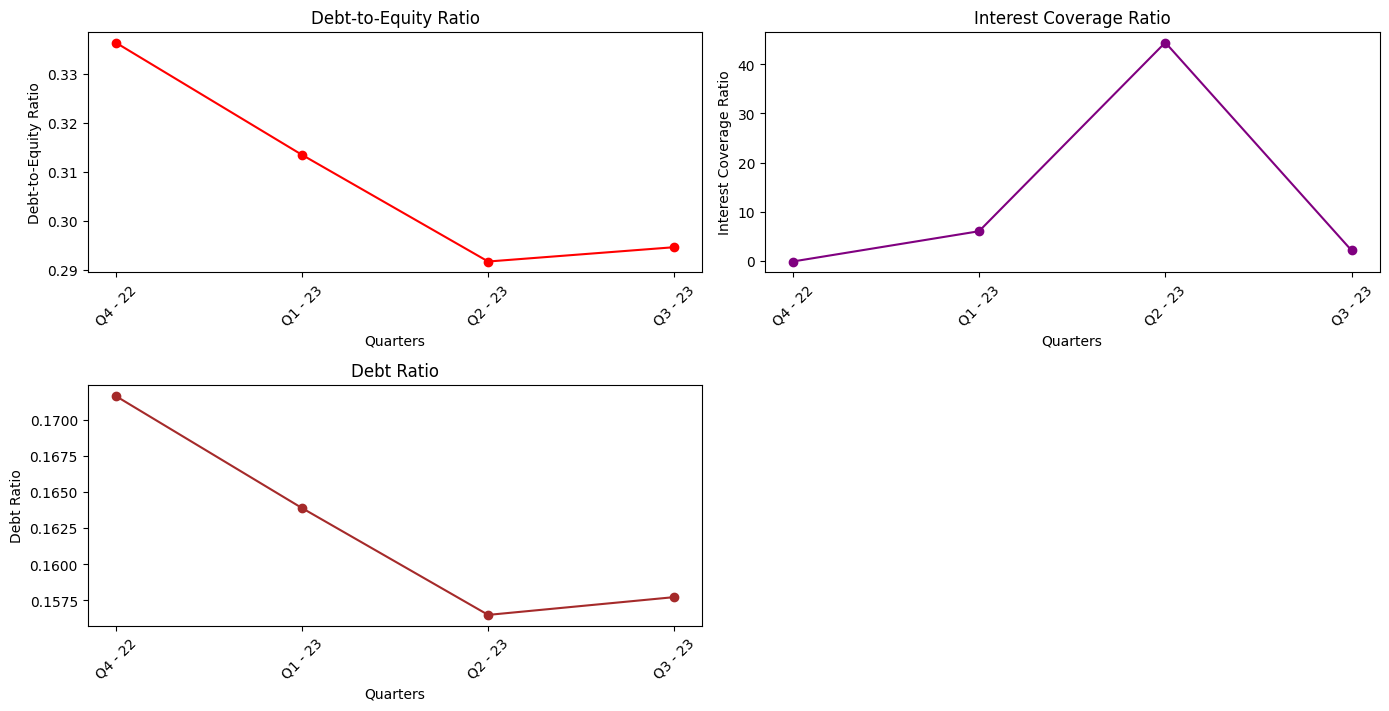

In [269]:
# Calculate Debt-to-Equity Ratio
merged_df['Debt-to-Equity Ratio'] = merged_df['Total Debt'] / merged_df['Common Stock Equity']

# Calculate Interest Coverage Ratio
merged_df['Interest Coverage Ratio'] = merged_df['Operating Income'] / merged_df['Net Non Operating Interest Income Expense']

# Calculate Debt Ratio
merged_df['Debt Ratio'] = merged_df['Total Debt'] / merged_df['Total Assets']

# Plotting the ratios over time
plt.figure(figsize=(14, 10))

# Debt-to-Equity Ratio
plt.subplot(3, 2, 1)
plt.plot(merged_df['Quarters'], merged_df['Debt-to-Equity Ratio'], marker='o', color='red')
plt.title('Debt-to-Equity Ratio')
plt.xlabel('Quarters')
plt.ylabel('Debt-to-Equity Ratio')
plt.xticks(rotation=45)

# Interest Coverage Ratio
plt.subplot(3, 2, 2)
plt.plot(merged_df['Quarters'], merged_df['Interest Coverage Ratio'], marker='o', color='purple')
plt.title('Interest Coverage Ratio')
plt.xlabel('Quarters')
plt.ylabel('Interest Coverage Ratio')
plt.xticks(rotation=45)

# Debt Ratio
plt.subplot(3, 2, 3)
plt.plot(merged_df['Quarters'], merged_df['Debt Ratio'], marker='o', color='brown')
plt.title('Debt Ratio')
plt.xlabel('Quarters')
plt.ylabel('Debt Ratio')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Debt-to-Equity Ratio:

There was a continuous decrease in the Debt-to-Equity Ratio from Q4 2022 through Q2 2023, indicating a diminishing reliance on debt relative to equity during that period.
However, in Q3 2023, there was a slight increase in the Debt-to-Equity Ratio after the preceding declines.
Interest Coverage Ratio:

The Interest Coverage Ratio experienced a decline in Q3 2023, implying that the company's operating income may not have been sufficient to cover its interest expenses during that quarter.
Debt Ratio:

Similar to the Debt-to-Equity Ratio, the Debt Ratio showed a decreasing trend from Q4 2022 to Q2 2023, signifying a reduced dependence on debt financing relative to total assets.
However, in Q3 2023, there was a minor increase in the Debt Ratio, indicating a slight uptick in debt relative to total assets after the previous decreases.
These trends suggest fluctuations in the company's debt management practices over the observed quarters, with varying degrees of reliance on debt financing and corresponding impacts on financial metrics such as interest coverage and debt ratios.

6. Earnings per Share (EPS) Analysis:

Basic EPS and Diluted EPS

Basic EPS (Earnings Per Share) and Diluted EPS are both measures of a company's profitability expressed on a per-share basis, but they are calculated differently and provide different insights into a company's financial performance.

Basic EPS provides a conservative measure of a company's earnings per share, while Diluted EPS provides a more conservative measure that accounts for the potential dilution of earnings from convertible securities.

Both metrics are important for investors to assess a company's financial performance and compare it with peers in the industry.


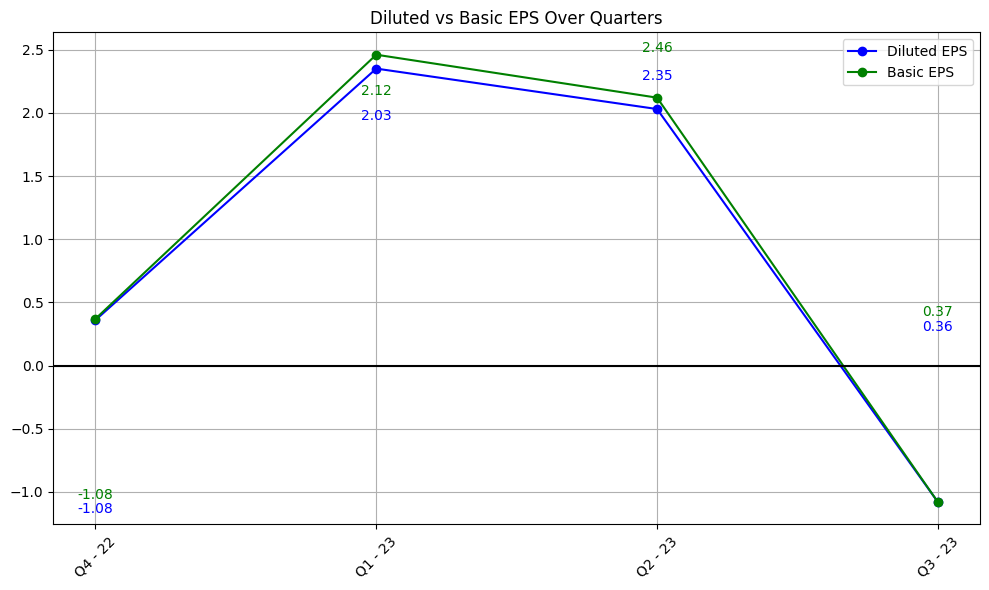

In [270]:
# Extract year and quarter into separate columns
new_data[['Quarter', 'Year']] = new_data['Quarters'].str.split(' - ', expand=True)

# Convert year to integer for proper sorting
new_data['Year'] = new_data['Year'].astype(int)

# Sort the DataFrame in descending order based on 'Quarters'
new_data_sorted = new_data.sort_values(by=['Year', 'Quarter'], ascending=[True, True])

diluted_eps = new_data_sorted['Diluted EPS']
basic_eps = new_data_sorted['Basic EPS']

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(new_data_sorted['Quarters'], diluted_eps, marker='o', label='Diluted EPS', color='blue')
plt.plot(new_data_sorted['Quarters'], basic_eps, marker='o', label='Basic EPS', color='green')

# Adding labels and title
plt.title('Diluted vs Basic EPS Over Quarters')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Add values on the plot
for i, (d_eps, b_eps) in enumerate(zip(diluted_eps, basic_eps)):
    plt.text(new_data_sorted['Quarters'][i], d_eps, f'{d_eps:.2f}', ha='center', va='top', color='blue')
    plt.text(new_data_sorted['Quarters'][i], b_eps, f'{b_eps:.2f}', ha='center', va='bottom', color='green')

# Draw x-axis
plt.axhline(y=0, color='black', linewidth=1.5)

# Show plot
plt.tight_layout()
plt.show()


The plot shows the trend of Diluted EPS over quarters.
From Q4 2022 to Q1 2023, Diluted EPS showed a positive trend.
Thereafter, from Q2 2023 to Q3 2023, Diluted EPS declined, reaching its lowest value in Q3 2023.

When Diluted EPS is negative, it indicates that the company's net income available to common shareholders is insufficient to cover the number of outstanding diluted shares. The reasons for this, as we have already seen:
Operating Losses: The company incurred significant operating losses during the quarter, reducing its net income or resulting in a net loss.

Investment Losses: Losses from investments or write-downs of assets could have affected the company's profitability.

Financial Performance: Poor financial performance, decline in sales, and lower-than-expected revenues.

In summary, a negative Diluted EPS in Q3 2023 suggests that the company's earnings were insufficient to cover the diluted shares outstanding during that period. This could be due to various operational, financial, or one-time factors affecting the company's profitability during that quarter.

Now, let's generate a comprehensive grid of KDE plots for the selected columns, allowing for easy comparison of their distributions.

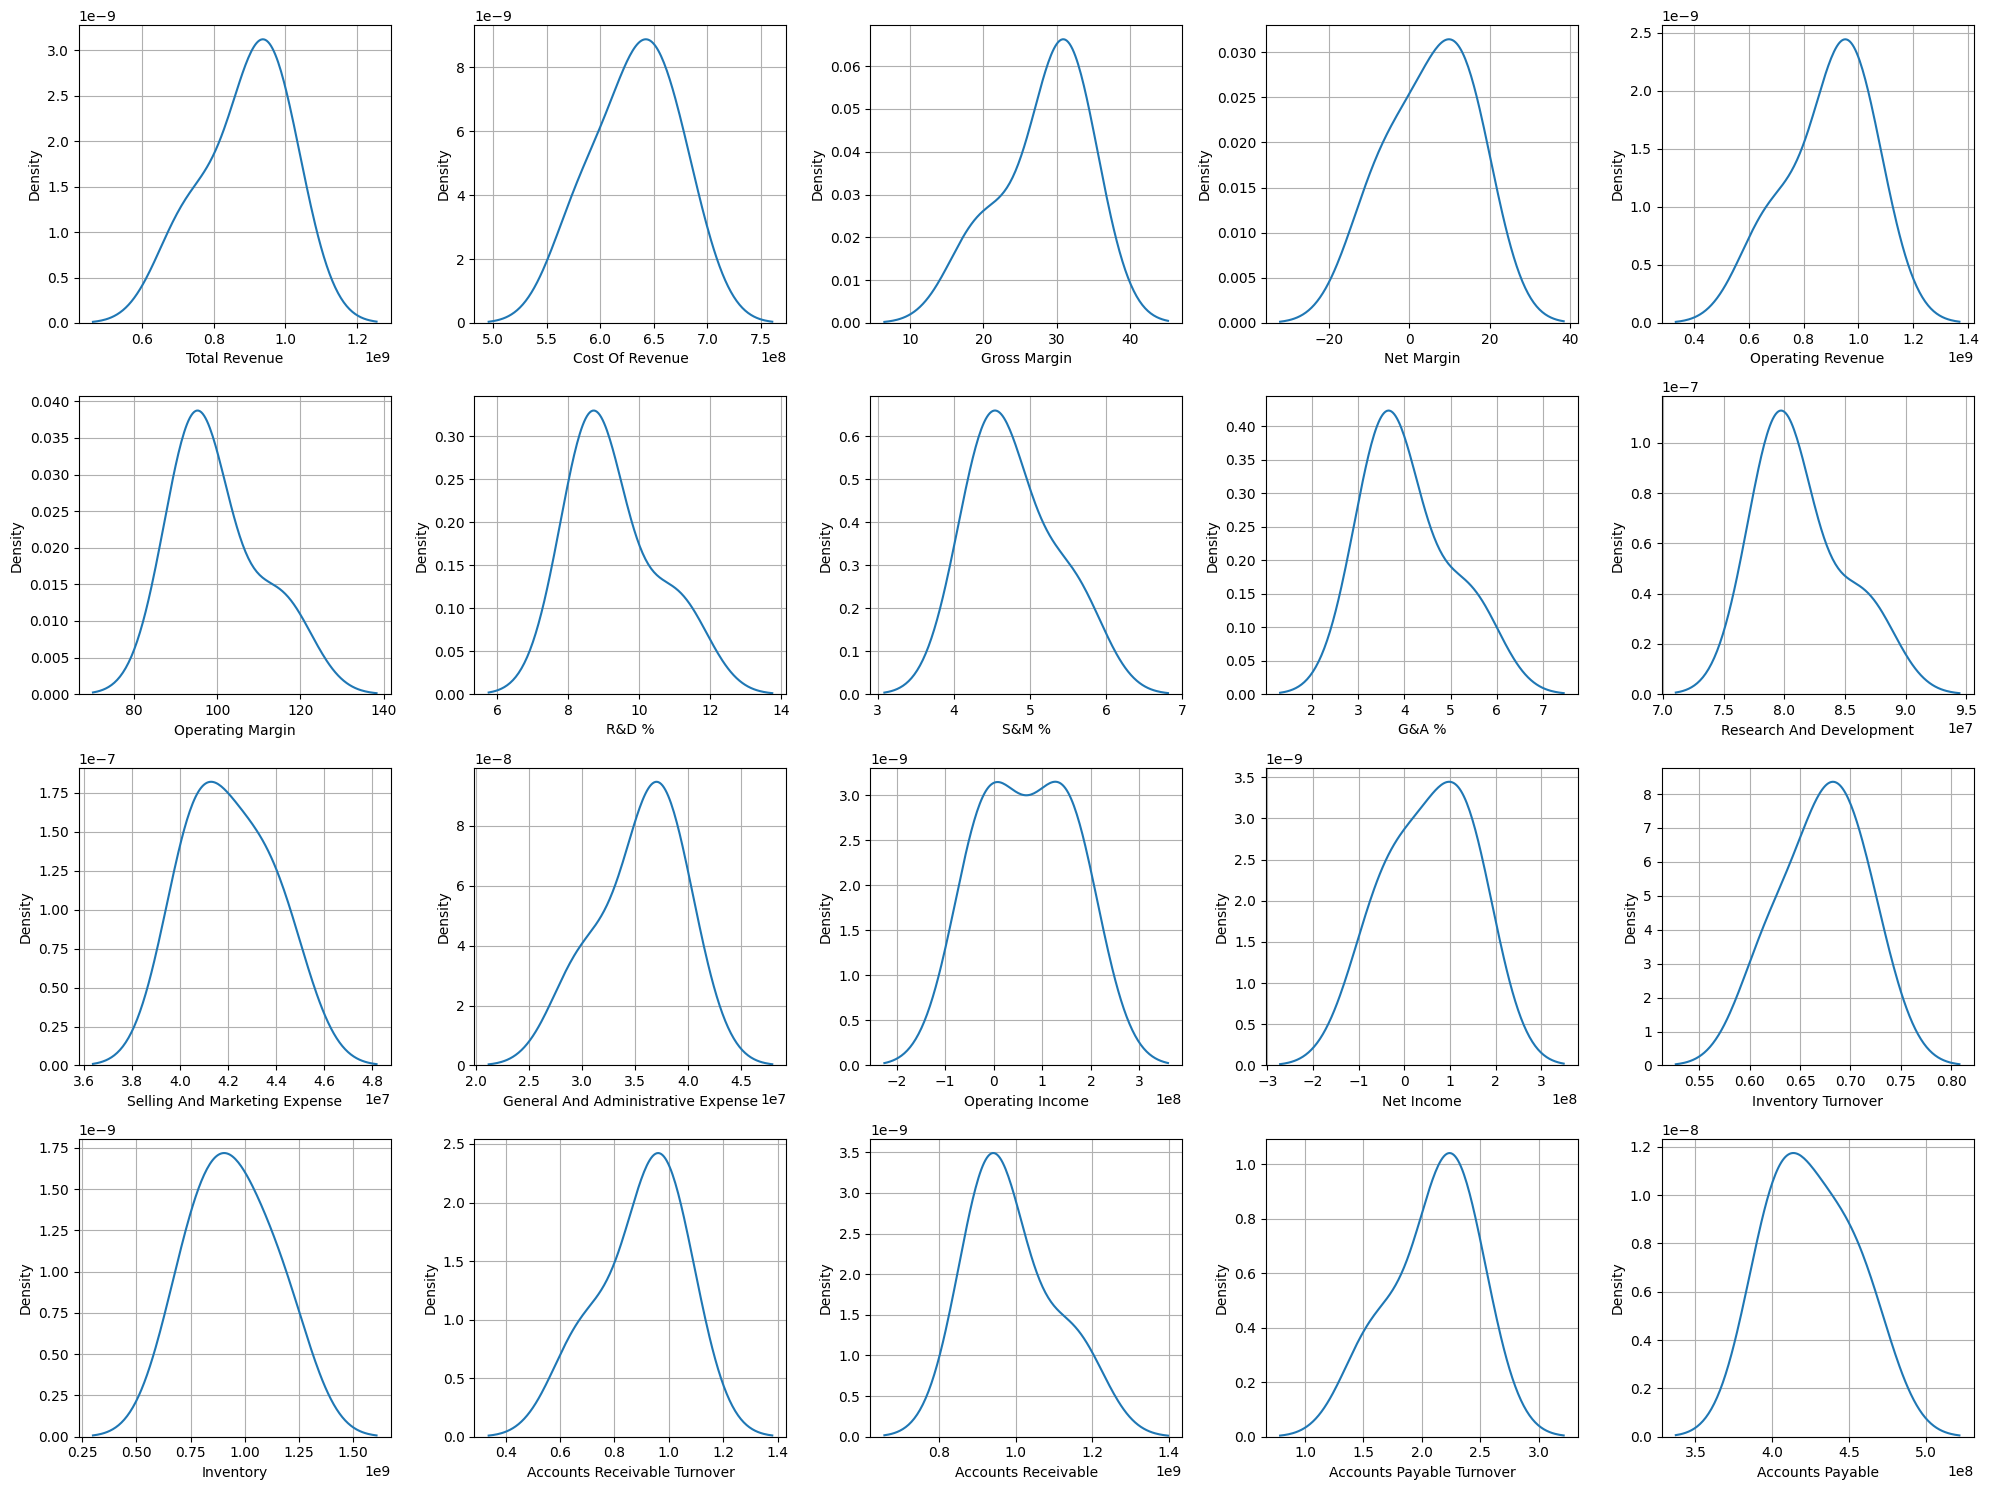

In [271]:
selected_columns = merged_df[['Total Revenue', 'Cost Of Revenue','Gross Margin', 'Net Margin', 'Operating Revenue', 'Operating Margin','R&D %', 'S&M %', 'G&A %',
         'Research And Development', 'Selling And Marketing Expense','General And Administrative Expense', 'Operating Income',
         'Net Income', 'Inventory Turnover', 'Inventory', 'Accounts Receivable Turnover', 'Accounts Receivable',
         'Accounts Payable Turnover', 'Accounts Payable', 'Current Ratio', 'Quick Ratio','Current Assets','Current Liabilities', 'EBITDA',
         'Total Debt', 'Common Stock Equity','Debt-to-Equity Ratio', 'Interest Coverage Ratio', 'Debt Ratio', 'Diluted EPS',
         'Basic EPS']]

# Define the number of rows and columns for subplots
r = 4
c = 5

# Calculate the total number of subplots
total_subplots = r * c

# Initialize the iteration counter
it = 1

# Set the size of the figure
plt.figure(figsize=(20, 15))

# Create subplots for KDE plots
for i in selected_columns.columns:
    if it <= total_subplots:
        plt.subplot(r, c, it)
        sns.kdeplot(selected_columns[i])
        plt.grid()
        it += 1
    else:
        break

plt.tight_layout()
plt.show()



The provided code generates a set of KDE (Kernel Density Estimation) plots for each column in our selected columns. KDE plots are used to visualize the probability density function of a continuous variable.

Each KDE plot represents the estimated probability density of the corresponding column's data. These plots help to understand the distribution of values within each column and can provide insights into the data's underlying distribution, such as whether it is symmetric, skewed, or multimodal.

In summary, the plot provides a visual representation of the distribution of each numerical variable in the selected_columns DataFrame.

We can observe that inventory, inventory turnover, and cost of revenue exhibit symmetric distributions, while operating income displays a bimodal distribution. Additionally, all other metrics demonstrate skewed distributions.

In [272]:
selected_columns.skew()

Total Revenue                        -1.288315
Cost Of Revenue                      -0.625494
Gross Margin                         -1.749750
Net Margin                           -0.774921
Operating Revenue                    -1.363823
Operating Margin                      1.903163
R&D %                                 1.880266
S&M %                                 1.358669
G&A %                                 1.689941
Research And Development              1.879578
Selling And Marketing Expense         0.535876
General And Administrative Expense   -1.305519
Operating Income                     -0.003484
Net Income                           -0.596218
Inventory Turnover                   -0.625494
Inventory                             0.339937
Accounts Receivable Turnover         -1.363823
Accounts Receivable                   1.656371
Accounts Payable Turnover            -1.363823
Accounts Payable                      0.585872
Current Ratio                        -1.163335
Quick Ratio  

Now, let's check how metrics from financial statements influence on stock prices.

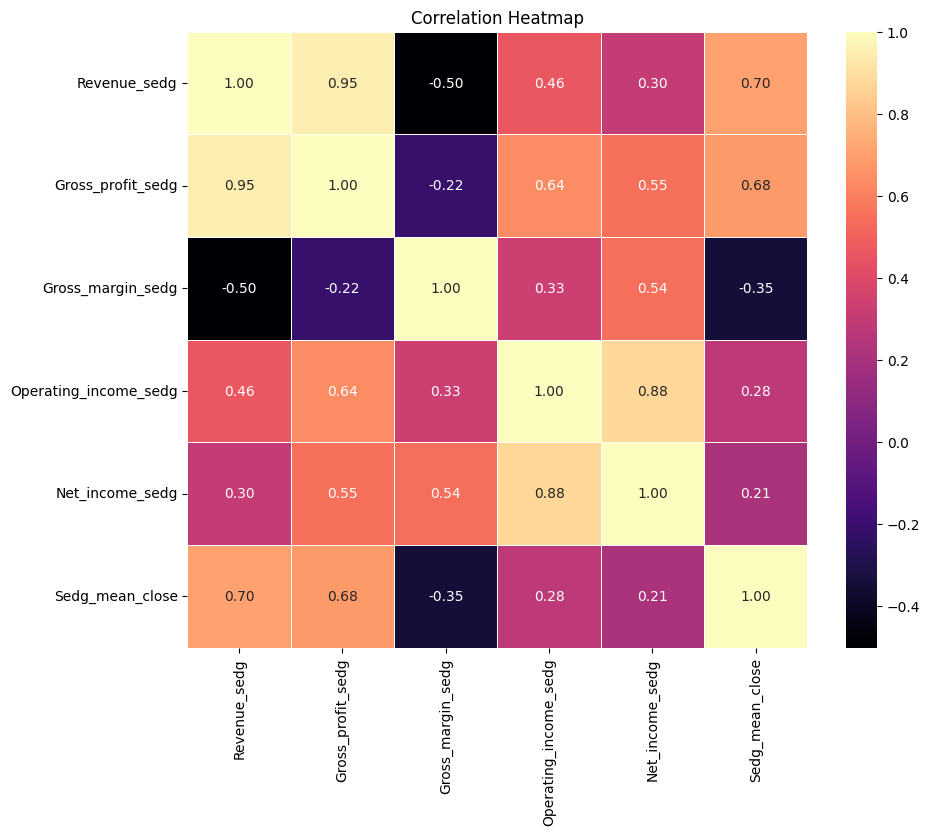

In [273]:
# Extract relevant columns from DataFrame
sedg_close_mean = merged_data[['Sedg_mean_close']]
financial_metrics = merged_data[['Revenue_sedg', 'Gross_profit_sedg', 'Gross_margin_sedg', 'Operating_income_sedg', 'Net_income_sedg']]

# Concatenate Sedg_mean_close and financial_metrics
cols_of_interest = pd.concat([financial_metrics,sedg_close_mean], axis=1)

# Calculating the correlation matrix
correlation_matrix = cols_of_interest.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

We can observe the highest positive relationship between Revenue and stock prices (0.7), as well as between Gross Profit and stock prices (0.68). Operating and Net income exhibit weaker yet still positive relationships with stock prices. However, Gross Margin shows a negative relationship with stock prices (-0.35).

In [274]:
plt.style.use('default')


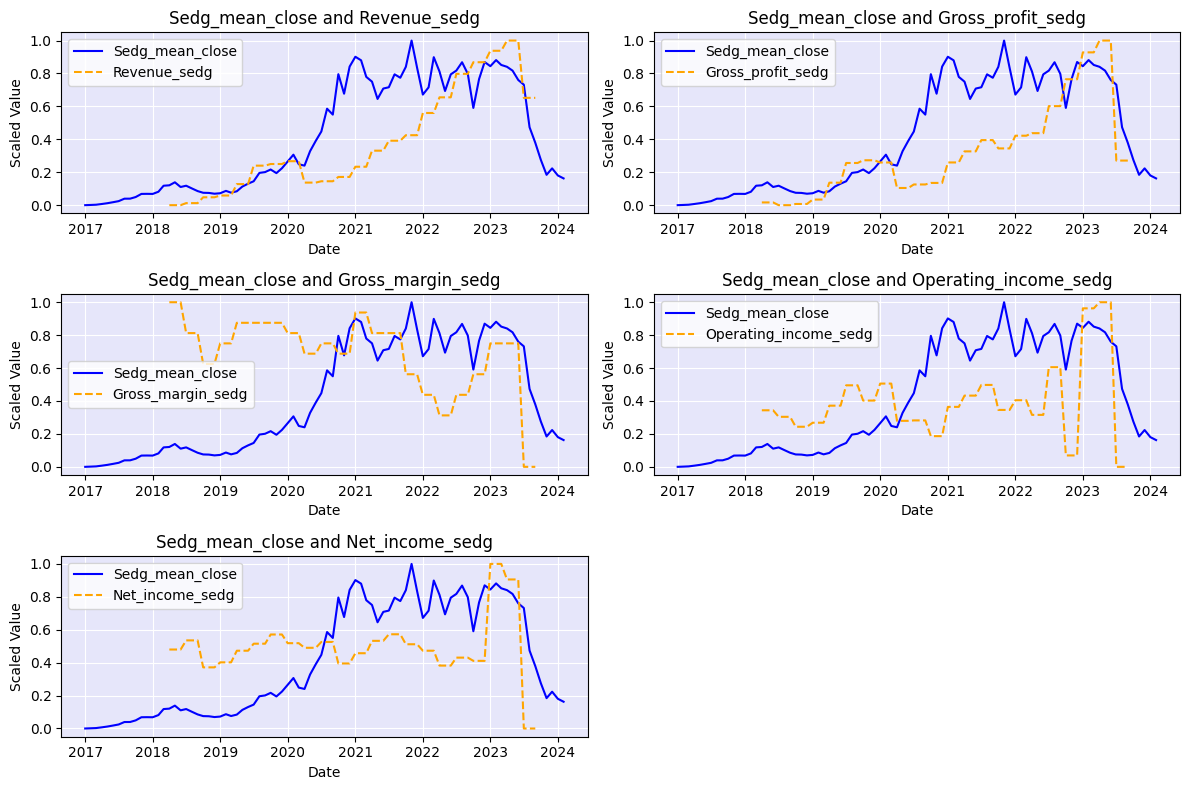

In [275]:
from sklearn.preprocessing import MinMaxScaler
# Perform min-max scaling on the data
scaler = MinMaxScaler()
sedg_close_mean_scaled = scaler.fit_transform(sedg_close_mean.values.reshape(-1, 1)).flatten()
financial_metrics_scaled = scaler.fit_transform(financial_metrics)

# Plot the relationship between Sedg_mean_close and financial metrics using line plots
plt.figure(figsize=(12, 8))
for i, metric in enumerate(financial_metrics.columns):
    plt.subplot(3, 2, i+1)
    plt.plot(merged_data['Date'], sedg_close_mean_scaled, label='Sedg_mean_close', color='blue')
    plt.plot(merged_data['Date'], financial_metrics_scaled[:, i], label=metric, linestyle='--', color='orange')
    plt.title(f'Sedg_mean_close and {metric}')
    plt.xlabel('Date')
    plt.ylabel('Scaled Value')
    plt.legend()
    plt.grid(color='white') 
    plt.gca().set_facecolor('lavender')

plt.tight_layout()
plt.show()
plt.rcdefaults()


We can observe, when all the financial metrics fell down, the stock prices fell down also. In third quartel 2023.

Overall, our analysis of the financial statements revealed a consistent trend across various metrics during the third quarter (Q3). Across all analyses conducted—Profitability, Efficiency, Liquidity, Debt Management, Earnings per Share (EPS), and Operating Expense—we observed a decline in key financial metrics during Q3. This decline was particularly notable in profitability metrics such as net profit margin and operating income, as well as efficiency metrics like inventory turnover.

Furthermore, our analysis highlighted a strong correlation between the financial health of the company and its stock market performance. Specifically, when unfavorable financial statements were released—indicating declining profitability, increased debt, and lower efficiency—the company's stock prices experienced a significant downturn.

In summary, the financial statements analysis underscored the importance of monitoring key financial metrics for assessing the company's performance and predicting its stock market behavior. 